# Clustering in Scikit-learn

Let's apply cluster analysis to our flights dataset.

In [35]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn
from sklearn.cluster import KMeans
from sklearn import linear_model, cross_validation, cluster
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.cross_validation  import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler



In [36]:

flights = pd.read_csv('../../data/nycflights13/flights.csv.gz')
weather = pd.read_csv('../../data/nycflights13/weather.csv.gz')
airports = pd.read_csv('../../data/nycflights13/airports.csv.gz')

df_withweather = pd.merge(flights, weather, how='left', on=['year','month', 'day', 'hour'])
df = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')

df = df.dropna()


In [37]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
10,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
11,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
12,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
13,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,10.0,2013-01-01 01:00:00,IAD,Washington Dulles Intl,38.944533,-77.455811,313.0,-5.0,A,America/New_York
14,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,10.0,2013-01-01 01:00:00,MCO,Orlando Intl,28.429394,-81.308994,96.0,-5.0,A,America/New_York


In [38]:

pred = 'dep_delay'
features =  ['month','day','dep_time','arr_time','carrier','dest','air_time','distance', 
             'lat', 'lon', 'alt',  'dewp', 'humid', 'wind_speed', 'wind_gust', 
             'precip', 'pressure', 'visib' ]

features_v = df[features]
pred_v = df[pred]

features_v

,month,day,dep_time,arr_time,carrier,dest,air_time,distance,lat,lon,alt,dewp,humid,wind_speed,wind_gust,precip,pressure,visib
4,1,1,554.0,812.0,DL,ATL,116.0,762,33.636719,-84.428067,1026.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
5,1,1,554.0,812.0,DL,ATL,116.0,762,33.636719,-84.428067,1026.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
6,1,1,554.0,812.0,DL,ATL,116.0,762,33.636719,-84.428067,1026.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
8,1,1,555.0,913.0,B6,FLL,158.0,1065,26.072583,-80.152750,9.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
9,1,1,555.0,913.0,B6,FLL,158.0,1065,26.072583,-80.152750,9.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
10,1,1,555.0,913.0,B6,FLL,158.0,1065,26.072583,-80.152750,9.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
11,1,1,557.0,709.0,EV,IAD,53.0,229,38.944533,-77.455811,313.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0
12,1,1,557.0,709.0,EV,IAD,53.0,229,38.944533,-77.455811,313.0,26.06,59.37,12.65858,14.567241,0.0,1012.6,10.0
13,1,1,557.0,709.0,EV,IAD,53.0,229,38.944533,-77.455811,313.0,26.06,57.33,13.80936,15.891535,0.0,1011.9,10.0
14,1,1,557.0,838.0,B6,MCO,140.0,944,28.429394,-81.308994,96.0,26.06,59.37,10.35702,11.918651,0.0,1012.0,10.0


In [39]:


how_late_is_late = 15.0;

pd.options.mode.chained_assignment = None  # default='warn'

# carrier is not a number, so transform it into an number
features_v['carrier'] = pd.factorize(features_v['carrier'])[0]

# dest is not a number, so transform it into a number
features_v['dest'] = pd.factorize(features_v['dest'])[0]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_v)


features_train, features_test = train_test_split(
    features_scaled,  test_size=0.30, random_state=0)





In [40]:

cluster = sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
cluster.fit(features_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
#predict our test features
result = cluster.predict(features_test)


In [42]:
result

array([6, 3, 6, ..., 6, 0, 3], dtype=int32)

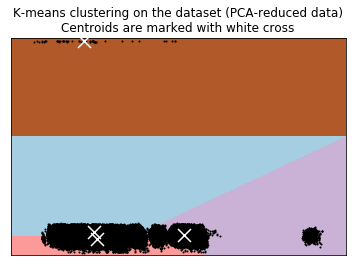

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(features_train)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()